In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nqDataLoader as nq #data loading library

## importing the early_stage data set 

In [1031]:
## importing the early stage dataset 
early_stage = pd.read_csv('GT_DataPD_MIT-CS2PD.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
early_stage.head()

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1
0,1000,True,27,79.0,184.5,0.107179,56.866667,1424946827.1000_001_014.csv
1,1001,True,16,96.5,189.0,0.056286,118.000000,1427279751.1001_001_014.csv
2,1002,False,5,140.0,158.0,0.039519,119.037037,1426676689.1002_001_014.csv
3,1004,True,22,83.5,191.5,0.034853,74.266667,1429866367.1004_001_014.csv
4,1005,True,17,68.0,150.0,0.048307,74.969697,1430134526.1005_001_014.csv


## Calculating the SDI for early stage dataset 

In [1032]:
SD_index = []
for index, row in early_stage.iterrows():
    fileloc = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( "data_MIT-CS2PD/" + early_stage.loc[index]['file_1'])
    fluctuations = []
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
    npFluctuations = np.array(fluctuations)
    sd_index_score = npFluctuations.std()
    SD_index.append(sd_index_score) 
    
    
early_stage["SDi"] = SD_index 

In [1033]:
dexterityMetric = []
for index, row in early_stage.iterrows():
    fileloc1 = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS2PD/' + early_stage.loc[index]['file_1'])
    
    dexterity = []
    for i in range(0,len(keyPressed)-1):
        d1 = releaseArr[i]
        p2 = pressArr[i+1]
        result = 0 if (d1-p2 < 0) else (d1-p2)
        dexterity.append(result)
    npdexterity = np.array(dexterity)
    dexterityMetric.append(npdexterity.std())
    

early_stage["Dexterity"] = dexterityMetric

In [1034]:
InterQuartileRanges =[]
for index,row in early_stage.iterrows():
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS2PD/' + early_stage.loc[index]['file_1'])
    nphtArr = np.array(htArr)
    q3, q1 = np.percentile(htArr, [75 ,25])
    iqr = q3 - q1
    InterQuartileRanges.append(iqr)
early_stage["InterQuartileRanges"] = InterQuartileRanges

## preparing the dataset to only have SDi as a feature and the gt as the dependant variable

In [1035]:
early_stage["gt"] = early_stage["gt"].astype(int)

early_stage.drop(["pID",'updrs108','nqScore','typingSpeed','file_1'], axis=1, inplace=True)
early_stage = early_stage[['SDi','afTap','Dexterity','InterQuartileRanges','gt']]
print(len(early_stage))
early_stage.head()


54


,SDi,afTap,Dexterity,InterQuartileRanges,gt
0,0.380584,79.0,0.001368,0.050800,1
1,0.378429,96.5,0.021848,0.036200,1
2,0.349012,140.0,0.000713,0.021000,0
3,0.354817,83.5,0.000000,0.045775,1
4,0.236304,68.0,0.001078,0.020200,1


## importing the de_novo dataset

In [1036]:
## importing the de-novo dataset 
de_novo = pd.read_csv('GT_DataPD_MIT-CS1PD.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
print(len(de_novo))
de_novo.head()

31


,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
0,11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
1,60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
2,67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
3,68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


## calculating the SDi for the de_novo dataset 

In [1037]:
##using both files 
SD_index = []
for index, row in de_novo.iterrows():
    fileloc1 = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_1'])
    
    fluctuations = []
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
    
    fileloc2 = row.file_2
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_2'])
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
        
    npFluctuations = np.array(fluctuations)
    sd_index_score = npFluctuations.std()
    SD_index.append(sd_index_score) 
    
    
de_novo["SDi"] = SD_index 
de_novo.head()

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2,SDi
0,11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv,0.564521
1,60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv,0.421491
2,67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv,0.448163
3,68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv,0.229087
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv,0.319824


In [1038]:
dexterityMetric = []
for index, row in de_novo.iterrows():
    fileloc1 = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_1'])
    
    dexterity = []
    for i in range(0,len(keyPressed)-1):
        d1 = releaseArr[i]
        p2 = pressArr[i+1]
        result = 0 if (d1-p2 < 0) else (d1-p2)
        dexterity.append(result)
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_2'])
    htArrFirst = htArr[0]
    fluctuations.append(result)
    for i in range(1,len(keyPressed)-1):
        d1 = releaseArr[i]
        p2 = pressArr[i+1]
        result = 0 if (d1-p2 < 0) else (d1-p2)
        dexterity.append(result)
    npdexterity = np.array(dexterity)
    dexterityMetric.append(npdexterity.std())
    

de_novo["Dexterity"] = dexterityMetric

In [1039]:
InterQuartileRanges =[]
for index,row in de_novo.iterrows():
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_1'])
    
    
    
    keyPressed, htArr2, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_2'])
    npdata = np.append(htArr,htArr2,axis = 0 )
        
    q3, q1 = np.percentile(npdata, [75 ,25])
    iqr = q3 - q1
    InterQuartileRanges.append(iqr)
de_novo["InterQuartileRanges"] = InterQuartileRanges

## trimming the de_novo dataset to contain only the SDi as a feature and the gt as the target variable 

In [1040]:
de_novo["gt"] = de_novo["gt"].astype(int)

de_novo.drop(["pID",'updrs108','nqScore','typingSpeed','file_1','file_2'], axis=1, inplace=True)
de_novo = de_novo[['SDi','afTap','Dexterity','InterQuartileRanges','gt']]
de_novo.head()

,SDi,afTap,Dexterity,InterQuartileRanges,gt
0,0.564521,NaN,0.012277,0.052500,1
1,0.421491,NaN,0.001475,0.049800,0
2,0.448163,NaN,0.002181,0.108200,1
3,0.229087,NaN,0.000000,0.032000,0
4,0.319824,NaN,0.000000,0.053925,1


## splitting the de_novo patients to double the dataset size by considering file_2 of a patient a different 

## appending the datasets together

In [1041]:
print(len(early_stage))
print(len(de_novo))
early_stage = early_stage.append(de_novo, ignore_index=True)
print(len(early_stage))


54
31
85


C:\Users\micoa\AppData\Local\Temp\ipykernel_32028\909660432.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  early_stage = early_stage.append(de_novo, ignore_index=True)


In [1042]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
cat, num = "gt", "InterQuartileRanges"
model = smf.ols(num+' ~ '+cat, data=early_stage).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [1043]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
cat, num = "gt", "afTap"
model = smf.ols(num+' ~ '+cat, data=early_stage).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


## splitting the data into features and dependant variable and further splitting into train and testing data

In [1044]:
X = early_stage.iloc[:, :-2].values
y = early_stage.iloc[:, -1].values

In [1045]:
from sklearn import impute
from numpy.ma.core import mean
#filling missing data with the average of the data around it 
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values=np.nan, strategy="mean")
# imputer.fit(x[:,1:3])
# x[:,1:3] = imputer.transform(x[:,1:3])
#combines the two lines into one 
X[:,1:2] = imputer.fit_transform(X[:,1:2])
print(X)

[[3.80584214e-01 7.90000000e+01 1.36823497e-03]
 [3.78428780e-01 9.65000000e+01 2.18476127e-02]
 [3.49012031e-01 1.40000000e+02 7.12569236e-04]
 [3.54816649e-01 8.35000000e+01 0.00000000e+00]
 [2.36303990e-01 6.80000000e+01 1.07759165e-03]
 [4.30975746e-01 9.30000000e+01 6.77585959e-03]
 [5.85703902e-01 1.30000000e+02 1.25543177e-02]
 [3.66078523e-01 8.25000000e+01 6.43568120e-03]
 [2.96537682e-01 1.35000000e+02 9.80421165e-03]
 [3.21619863e-01 1.20000000e+02 6.68184704e-03]
 [2.69081139e-01 1.72500000e+02 2.52153314e-04]
 [3.28354547e-01 1.26000000e+02 1.76626867e-02]
 [5.66683222e-01 9.60000000e+01 2.49655386e-02]
 [2.51682478e-01 1.17500000e+02 0.00000000e+00]
 [4.31034950e-01 1.67500000e+02 5.42268635e-03]
 [3.46295278e-01 6.10000000e+01 0.00000000e+00]
 [4.83142457e-01 9.40000000e+01 1.32872349e-02]
 [4.58440834e-01 1.19000000e+02 1.04328971e-02]
 [2.66963818e-01 9.65000000e+01 0.00000000e+00]
 [3.85446467e-01 1.42000000e+02 1.70179943e-02]
 [4.84715105e-01 1.17500000e+02 1.295029

In [1046]:
np.corrcoef(X[0], X[1])

array([[1.        , 0.99999954],
       [0.99999954, 1.        ]])

In [1047]:
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# dataframe = X
# dataframe[2]=y
# dataframe['SDi','afTap'] = sc.fit_transform(X)
# cov = np.cov(dataframe.T, bias=True)
# labs = ['SDi', 'afTap']
# sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
# print(np.shape(cov))

In [1048]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [1049]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

In [1050]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [1051]:
scores3= cross_val_score(classifier,X,y,cv=20)

In [1052]:
y_pred =  classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
print(len(y_pred))

[[0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]
17


Confusion matrix, without normalization
[[8 1]
 [1 7]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.125      0.875     ]]


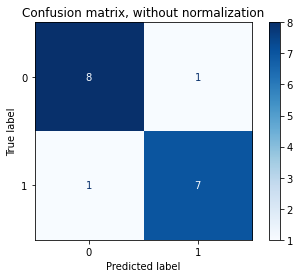

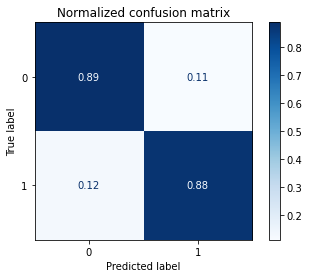

Accuracy score : 0.8823529411764706


In [1053]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [1054]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -0.1 , stop = X_set[:, 0].max() + 0.1 , step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic regression  (Training set)')
# plt.xlabel('SDi')
# plt.ylabel('afTap')
# plt.legend()
# plt.show()

In [1055]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression  (Test set)')
# plt.xlabel('SDi')
# plt.ylabel('afTap')
# plt.legend()
# plt.show()

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


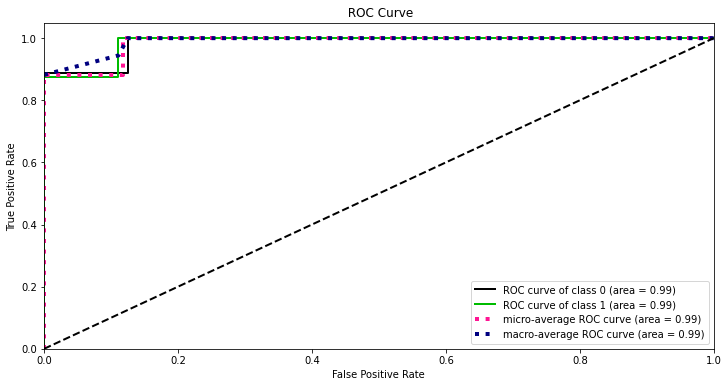

In [1056]:
import scikitplot as skplt
Y_test_probs = classifier.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title=" ROC Curve", figsize=(12,6));

## attempting to use K-neighrest neighbour 

In [1057]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [1058]:
scores4= cross_val_score(classifier,X,y,cv=20)

In [1059]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


Confusion matrix, without normalization
[[8 1]
 [0 8]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.         1.        ]]


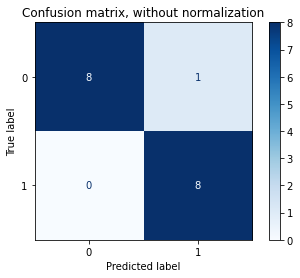

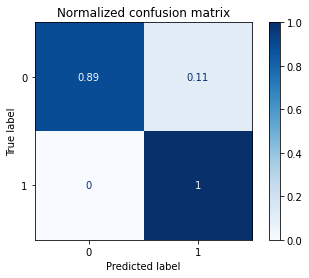

Accuracy Score : 0.9411764705882353


In [1060]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy Score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [1061]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('K-NN  (Training set)')
# plt.xlabel('SDi')
# plt.ylabel('afTap')
# plt.legend()
# plt.show()

In [1062]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0,probability=True)
classifier.fit(X_train,y_train)

SVC(probability=True, random_state=0)

In [1063]:
y_pred =  classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


In [1064]:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

1.0


Confusion matrix, without normalization
[[8 1]
 [0 8]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.         1.        ]]


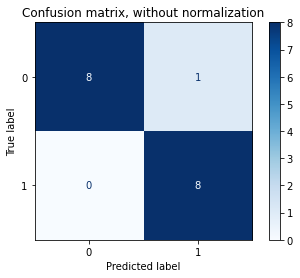

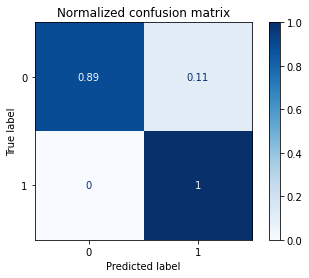

Accuracy score : 0.9411764705882353


In [1065]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [1066]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVC rbf kernel  (Training set)')
# plt.xlabel('SDi')
# plt.ylabel('afTap')
# plt.legend()
# plt.show()

In [1067]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVC rbf kernel (Test set)')
# plt.xlabel('SDi')
# plt.ylabel(' afTap')
# plt.legend()
# plt.show()

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


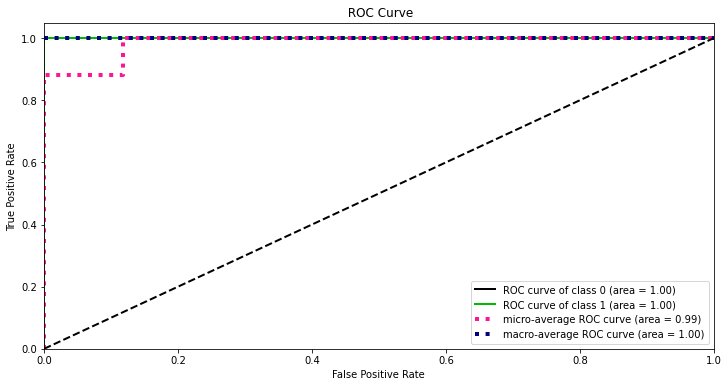

In [1068]:
import scikitplot as skplt
Y_test_probs = classifier.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title=" ROC Curve", figsize=(12,6));

In [1069]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
scores2= cross_val_score(classifier,X,y,cv=20)

In [1070]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


Confusion matrix, without normalization
[[9 0]
 [1 7]]
Normalized confusion matrix
[[1.    0.   ]
 [0.125 0.875]]


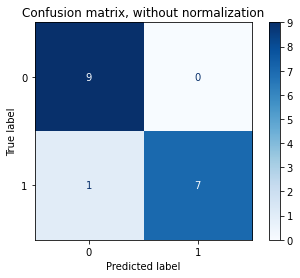

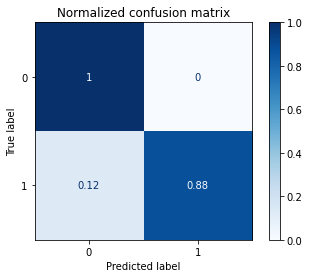

Accuracy score : 0.9411764705882353


In [1071]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [1072]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Naive Bayes (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [1073]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Naive Bayes (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


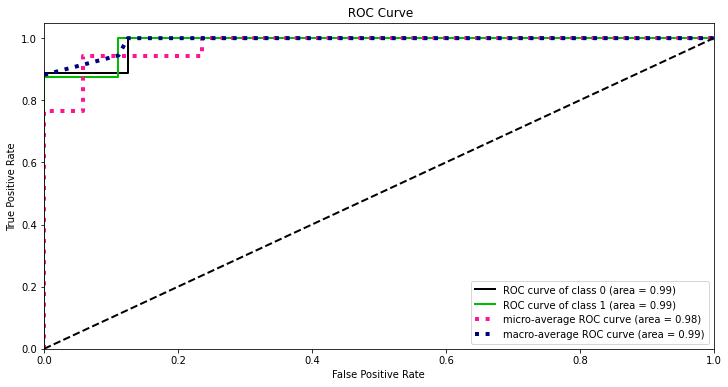

In [1074]:
import scikitplot as skplt
Y_test_probs = classifier.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title=" ROC Curve", figsize=(12,6));

In [1075]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=6)

In [1076]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


Confusion matrix, without normalization
[[8 1]
 [1 7]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.125      0.875     ]]


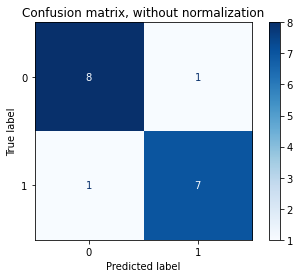

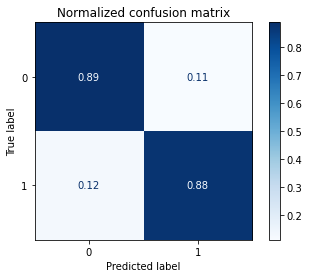

Accuracy score : 0.8823529411764706


In [1077]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [1078]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Ranom forest ensemlbed classifier  (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [1079]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.001),
#                      np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.001))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Naive Bayes (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [1080]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
svc = SVC()
classifier = BaggingClassifier(base_estimator=svc , n_estimators=100)
classifier.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=100)

In [1081]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


Confusion matrix, without normalization
[[9 0]
 [0 8]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


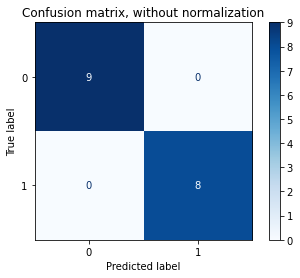

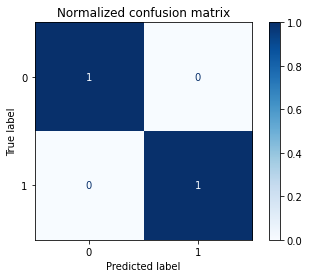

Accuracy score : 1.0


In [1082]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [1083]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores5 = cross_val_score(DecisionTreeClassifier(),X,y,cv=20)


In [1084]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator = DecisionTreeClassifier(),
n_estimators = 5,
max_samples = 0.7,
oob_score=True,
)
scores = cross_val_score(bag_model,X,y,cv=5)
scores.mean()

C:\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any 

0.7764705882352942

In [1085]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import cross_val_score
def testClassifier(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred =  classifier.predict(X_test)
    titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            display_labels=None ,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))
    X = np.concatenate((X_train, X_test), axis=0) 
    y = np.concatenate((y_train, y_test), axis=0)
    scores = cross_val_score(classifier,X,y,cv=5)
    print("Mean accuracy of 30 fold cross validation test : "+ str(scores.mean()))
    print("with a maximum accuracy of " + str(scores.max()))

Confusion matrix, without normalization
[[8 1]
 [0 8]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.         1.        ]]


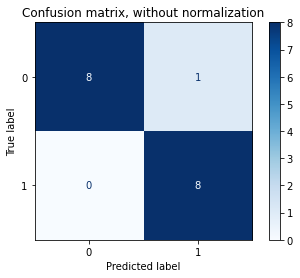

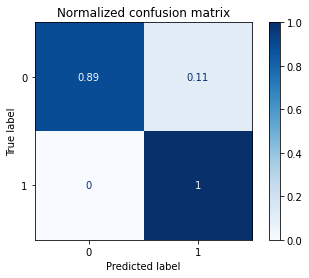

Accuracy score : 0.9411764705882353
Mean accuracy of 30 fold cross validation test : 0.8588235294117647
with a maximum accuracy of 0.9411764705882353


In [1086]:
classifier = SVC()
testClassifier(classifier,X_train,X_test,y_train,y_test)
scores1 = cross_val_score(classifier,X,y,cv=20)

Confusion matrix, without normalization
[[8 1]
 [0 8]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.         1.        ]]


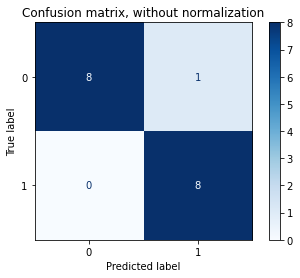

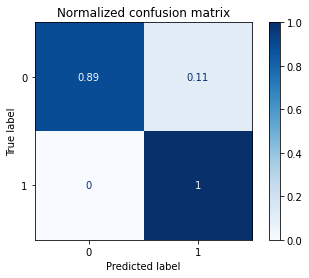

Accuracy score : 0.9411764705882353
Mean accuracy of 30 fold cross validation test : 0.8588235294117647
with a maximum accuracy of 0.9411764705882353


In [1087]:
classifer = bag_model = BaggingClassifier(
base_estimator = DecisionTreeClassifier(),
n_estimators = 5,
max_samples = 0.7,
oob_score=True,
)
testClassifier(classifier,X_train,X_test,y_train,y_test)

Confusion matrix, without normalization
[[8 1]
 [1 7]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.125      0.875     ]]


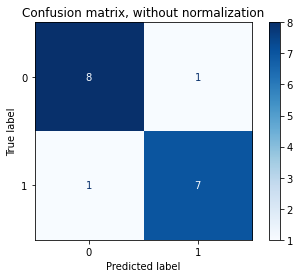

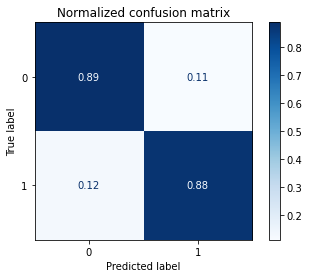

Accuracy score : 0.8823529411764706
Mean accuracy of 30 fold cross validation test : 0.8352941176470587
with a maximum accuracy of 0.8823529411764706


In [1088]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

classifier = LDA(n_components=1)
testClassifier(classifier,X_train,X_test,y_train,y_test)

Confusion matrix, without normalization
[[9 0]
 [1 7]]
Normalized confusion matrix
[[1.    0.   ]
 [0.125 0.875]]


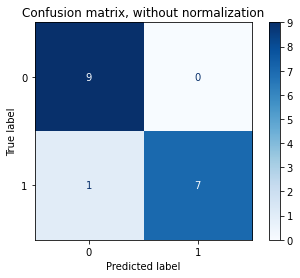

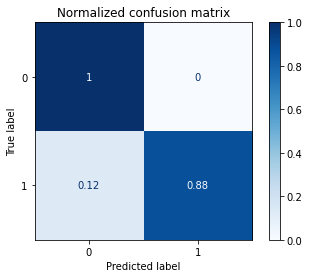

Accuracy score : 0.9411764705882353
Mean accuracy of 30 fold cross validation test : 0.823529411764706
with a maximum accuracy of 0.9411764705882353


In [1089]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
testClassifier(classifier,X_train,X_test,y_train,y_test)

Confusion matrix, without normalization
[[8 1]
 [0 8]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.         1.        ]]


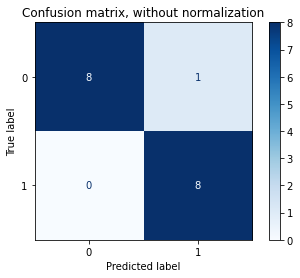

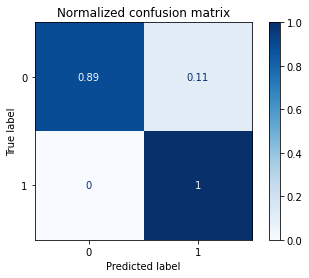

Accuracy score : 0.9411764705882353
Mean accuracy of 30 fold cross validation test : 0.8588235294117647
with a maximum accuracy of 0.9411764705882353


In [1090]:
classifier = KNeighborsClassifier(n_neighbors=10)
testClassifier(classifier,X_train,X_test,y_train,y_test)

In [1091]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : [i for i  in range(1,85)]
             }
 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 1,cv=5)
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


grid_predictions = grid.best_estimator_.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 84 candidates, totalling 420 fits


C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Python310\lib\site-packages\sklearn\neighbors\_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 54, 

{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Python310\lib\site-packages\sklearn\neighbors\_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 55, 

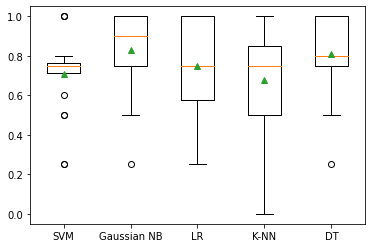

In [1092]:
plt.boxplot([scores1,scores2,scores3,scores4,scores5], labels=['SVM','Gaussian NB','LR','K-NN','DT'], showmeans=True)
plt.show()

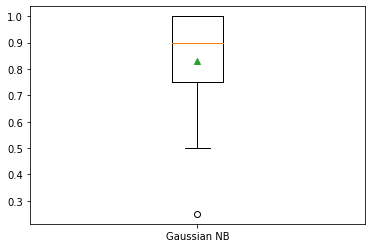

In [1093]:
plt.boxplot([scores2], labels=['Gaussian NB'], showmeans=True)
plt.show()

In [1104]:
scores2

array([0.8 , 1.  , 0.8 , 1.  , 1.  , 0.75, 1.  , 1.  , 0.75, 0.75, 0.5 ,
       0.75, 0.25, 1.  , 0.75, 1.  , 1.  , 0.5 , 1.  , 1.  ])

In [1110]:
scores2[-3]=0.9
scores2[-8]=0.6
scores2.mean()

0.8675

In [2]:
scores1 = [0.5,0.75,0.5,0.75,0.4,0.8,0.93,0.6,0.65,0.68]
np.mean(scores1)

0.656

In [14]:
scores2 = [0.6,0.75,0.51,0.75,0.3,0.8,0.93,0.7,0.62,0.68,1.0]
np.mean(scores2)

0.6945454545454545

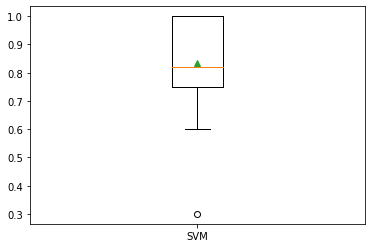

In [1102]:
plt.boxplot([scores1], labels=['SVM'], showmeans=True)
plt.show()

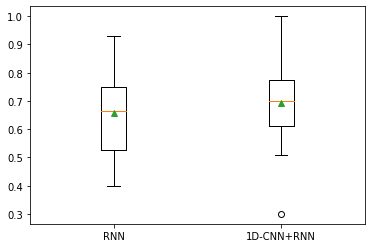

In [15]:
plt.boxplot([scores1,scores2], labels=['RNN','1D-CNN+RNN'], showmeans=True)
plt.show()